In [104]:
import numpy as np
import scipy
import os
import simulation_scripts
import matplotlib.pyplot as plt
from cycler import cycler
import importlib
importlib.reload(simulation_scripts)

<module 'simulation_scripts' from '/Users/ruby/Astro/requantization_sim/simulation_scripts.py'>

In [181]:
plt.rcParams["font.size"] = 12
color_array = [
    "tab:blue",
    "tab:red",
    "tab:purple",
    "tab:orange",
    "tab:cyan",
    "tab:pink",
    "tab:olive",
]
plt.rcParams["axes.prop_cycle"] = cycler(color=color_array)

# Summary Plots

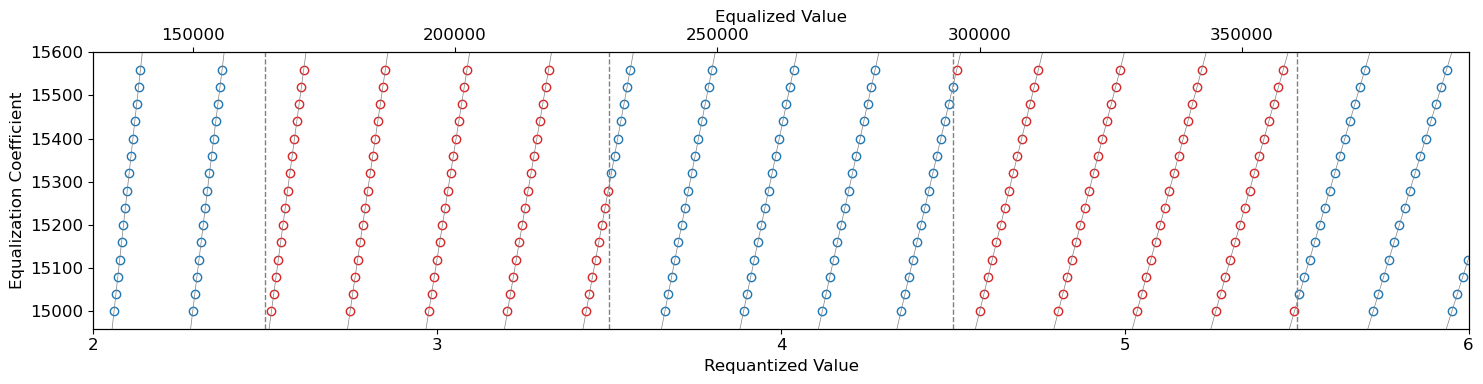

In [45]:
requantization_gain = 2**16
equalization_coeffs = np.arange(15000-40, 15640, 40)

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for equalization_coeff in equalization_coeffs[1:-1]:

    equalized_values = np.arange(-100, 100) * equalization_coeff
    even_values = equalized_values[np.where(np.round(equalized_values/requantization_gain)%2 == 0)]
    odd_values = equalized_values[
        np.where(np.round(equalized_values / requantization_gain) % 2 != 0)
    ]
    ax1.plot(
        even_values/requantization_gain,
        np.full_like(even_values, equalization_coeff),
        "o",
        markerfacecolor="none",
        color="tab:blue"
    )
    ax1.plot(
        odd_values / requantization_gain,
        np.full_like(odd_values, equalization_coeff),
        "o",
        markerfacecolor="none",
        color="tab:red"
    )

for int_value in np.arange(-100, 100):
    ax1.plot(int_value * equalization_coeffs / requantization_gain, equalization_coeffs, "-", color="grey", linewidth=.5)
for boundary_value in np.arange(2, 6) + 0.5:
    ax1.plot(
        [boundary_value, boundary_value],
        [np.min(equalization_coeffs), np.max(equalization_coeffs)],
        "--",
        color="grey",
        linewidth=1,
    )

ax1.set_xticks(np.arange(-7, 8))
ax1.set_xlim((2, 6))
ax1.set_ylim((np.min(equalization_coeffs), np.max(equalization_coeffs)))
ax1.set_xlabel("Requantized Value")
ax1.set_ylabel("Equalization Coefficient")
ax2.set_xlim(np.array(ax1.get_xlim()) * requantization_gain)
ax2.set_xlabel("Equalized Value")
# ax1.grid()
# plt.show()
plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/requantization_value_drift.png", dpi=300)

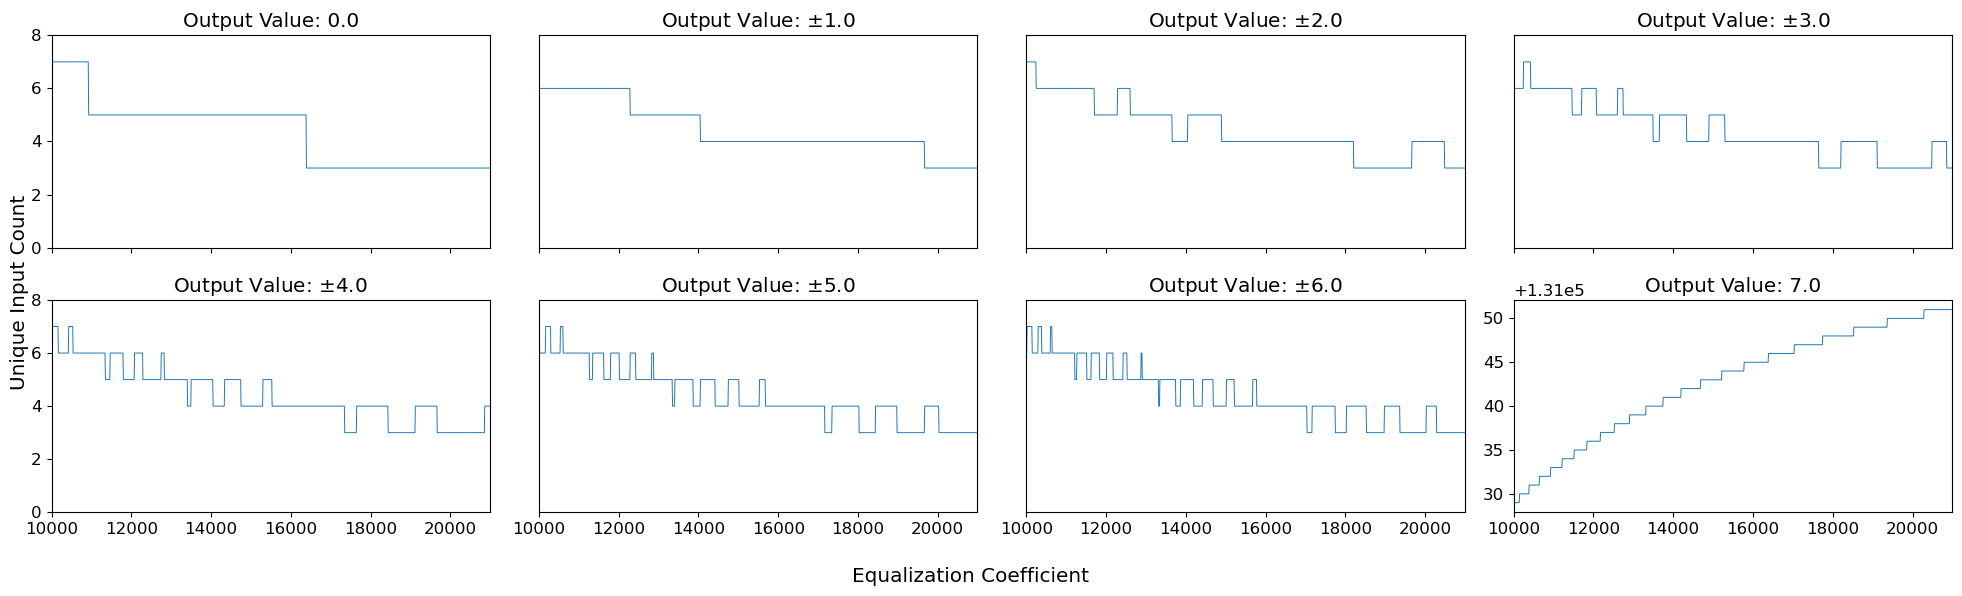

In [ ]:
eq_coeffs = np.arange(10000, 21000, 10)
use_requantized_value_options = simulation_scripts.get_quantized_value_options(
    4,
    0,
    signed=True,
    enforce_symmetry=True,
)
quantized_xvals = simulation_scripts.get_quantized_value_options(
    18,
    0,
    signed=True,
    enforce_symmetry=False,
)
requantization_gain = 2**16

number_of_values = np.zeros(
    (len(eq_coeffs), len(use_requantized_value_options)), dtype=int
)

for coeff_ind, eq_coeff in enumerate(eq_coeffs):
    requantized_values = simulation_scripts.quantize(
        quantized_xvals * eq_coeff / requantization_gain,
        4,
        0,
        signed=True,
        enforce_symmetry=True,
    )
    for output_ind, output in enumerate(use_requantized_value_options):
        number_of_values[coeff_ind, output_ind] = len(
            np.where(requantized_values == output)[0]
        )

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 6), sharey=False, sharex=True)
plot_requantized_inds = [7, 8, 9, 10, 11, 12, 13, 14]
for plot_ind, output_ind in enumerate(plot_requantized_inds):
    output_value = use_requantized_value_options[output_ind]
    use_ax = ax.flatten()[plot_ind]
    use_ax.plot(
        eq_coeffs,
        number_of_values[:, output_ind],
        "-",
        linewidth=0.7,
        label=use_requantized_value_options[output_ind],
    )
    if output_ind in [7, 14]:
        use_ax.set_title(f"Output Value: {output_value}")
    else:
        use_ax.set_title(f"Output Value: $\pm${output_value}")
    if output_ind not in [7, 11, 14]:
        use_ax.get_yaxis().set_visible(False)
    use_ax.set_xlim([np.min(eq_coeffs), np.max(eq_coeffs)])
    if output_ind != 14:
        use_ax.set_ylim([0, 8])

fig.supxlabel("Equalization Coefficient")
fig.supylabel("Unique Input Count")
plt.tight_layout()
#plt.savefig("/Users/ruby/Downloads/unique_values_hist.png", dpi=300)

# Simulation Code

Processing frequency 1 of 28000.
Processing frequency 11 of 28000.
Processing frequency 21 of 28000.
Processing frequency 31 of 28000.
Processing frequency 41 of 28000.
Processing frequency 51 of 28000.
Processing frequency 61 of 28000.
Processing frequency 71 of 28000.
Processing frequency 81 of 28000.
Processing frequency 91 of 28000.
Processing frequency 101 of 28000.
Processing frequency 111 of 28000.
Processing frequency 121 of 28000.
Processing frequency 131 of 28000.
Processing frequency 141 of 28000.
Processing frequency 151 of 28000.
Processing frequency 161 of 28000.
Processing frequency 171 of 28000.
Processing frequency 181 of 28000.
Processing frequency 191 of 28000.
Processing frequency 201 of 28000.
Processing frequency 211 of 28000.
Processing frequency 221 of 28000.
Processing frequency 231 of 28000.
Processing frequency 241 of 28000.
Processing frequency 251 of 28000.
Processing frequency 261 of 28000.
Processing frequency 271 of 28000.
Processing frequency 281 of 280

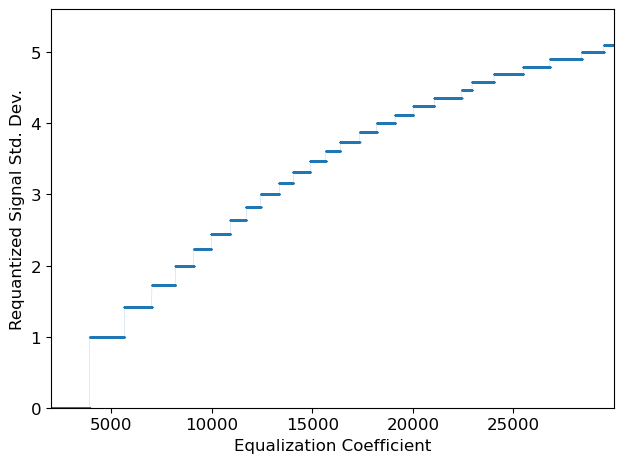

In [238]:
equalization_coeffs = np.arange(2000, 30000)
final_variances, final_autocorrs = simulation_scripts.requantization_sim(
    np.full_like(equalization_coeffs, 16, dtype=float),
    equalization_coeffs,
    input_bits_total=18,
    input_bits_fractional=0,
    output_bits_total=4,
    output_bits_fractional=0,
    requantization_gain=2**16,
)
plt.plot(
    equalization_coeffs,
    np.sqrt(final_variances),
    ".-",
    markersize=0.3,
    linewidth=0.1,
)
plt.ylim([0, 1.1 * np.max(np.sqrt(final_variances))])
plt.xlim([np.min(equalization_coeffs), np.max(equalization_coeffs)])
plt.xlabel("Equalization Coefficient")
plt.ylabel("Requantized Signal Std. Dev.")
plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/stddev_vs_coeff.png", dpi=300)
plt.show()

# Instrument Simulation

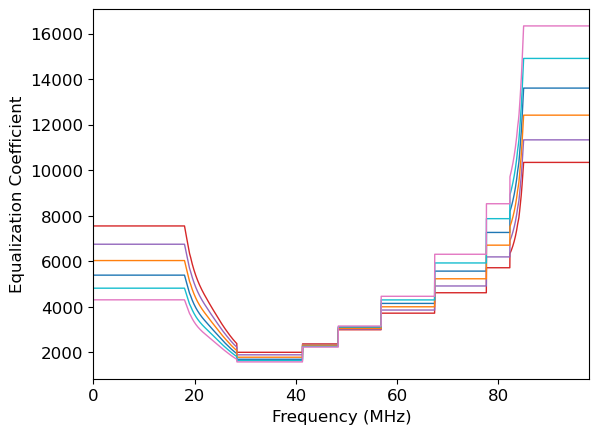

In [312]:
current_dir = os.getcwd()
# eq_coeffs_mat = scipy.io.loadmat(f"{current_dir}/20250612-settingsAll-day_smoothed.mat")
eq_coeffs_mat = scipy.io.loadmat(f"{current_dir}/20251120f-settingsAll-night-FW7p5")  # Piecewise constant
channel_width_mhz = 23925.78125 * 1e-6
freq_array = np.arange(len(eq_coeffs_mat["coef"][0, :])) * channel_width_mhz
for ind in range(6):
    plt.plot(freq_array, eq_coeffs_mat["coef"][ind, :], "-", linewidth=1)
plt.xlim([np.min(freq_array), np.max(freq_array)])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Equalization Coefficient")
plt.savefig("/Users/ruby/Downloads/eq_coeffs_piecewise.png", dpi=300)

use_eq_coeffs = eq_coeffs_mat["coef"][0, :]

In [8]:
requantization_gain = 2**16
target_value = 3 * requantization_gain  # Ideal stddev for the 4-bit quantization
print(target_value)

196608


dB variation: 19.410339865114747
dB variation: 15.803469834086494
dB variation: 16.997009979948132
dB variation: 18.198213447117435
dB variation: 20.627806159394563
dB variation: 21.848012170137977


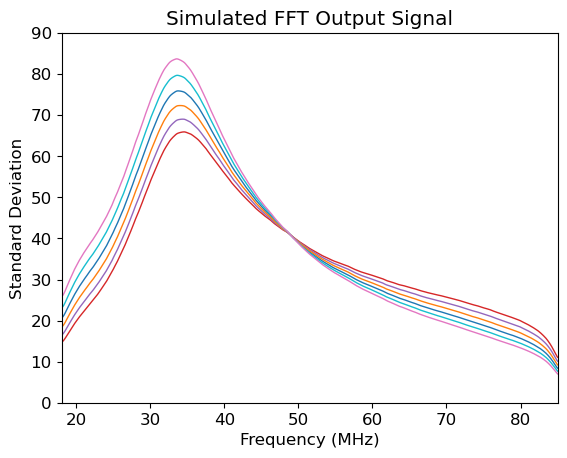

In [171]:
for ind in range(6):
    data_stddev = target_value / eq_coeffs_mat["coef"][ind, :]
    print(f"dB variation: {10*np.log10((np.max(data_stddev)/np.min(data_stddev))**2)}")
    plt.plot(freq_array, data_stddev, "-", linewidth=1)
plt.xlim([18, 85])
plt.ylim([0, 90])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Standard Deviation")
plt.title("Simulated FFT Output Signal")
plt.savefig("/Users/ruby/Downloads/simulation_input.png", dpi=300)

In [150]:
final_variances, final_autocorrs = simulation_scripts.requantization_sim(
    data_stddev[2000:2100],
    use_eq_coeffs[2000:2100],
    input_bits_total=18,
    input_bits_fractional=0,
    eq_coeff_bits_total=14,
    eq_coeff_bits_fractional=0,
    output_bits_total=4,
    output_bits_fractional=0,
    requantization_gain=requantization_gain,
)  # Run simulation

Processing frequency 1 of 100.
Processing frequency 11 of 100.
Processing frequency 21 of 100.
Processing frequency 31 of 100.
Processing frequency 41 of 100.
Processing frequency 51 of 100.
Processing frequency 61 of 100.
Processing frequency 71 of 100.
Processing frequency 81 of 100.
Processing frequency 91 of 100.


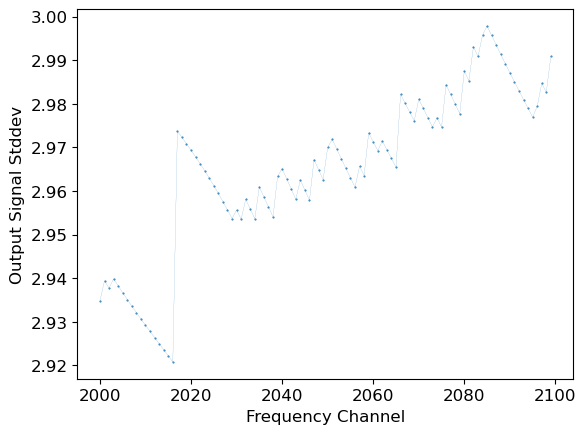

In [151]:
plt.plot(
    np.arange(2000, 2100),
    np.sqrt(final_variances),
    ".-",
    markersize=1,
    linewidth=0.1,
    color="tab:blue",
)
plt.xlabel("Frequency Channel")
plt.ylabel("Output Signal Stddev")
plt.show()

In [12]:
# Test increasing the bit depth
final_variances, final_autocorrs = simulation_scripts.requantization_sim(
    data_stddev[2000:2100],
    use_eq_coeffs[2000:2100],
    input_bits_total=18,
    input_bits_fractional=0,
    eq_coeff_bits_total=14,
    eq_coeff_bits_fractional=0,
    output_bits_total=5,
    output_bits_fractional=0,
    requantization_gain=requantization_gain / 2,
)  # Run simulation

KeyboardInterrupt: 

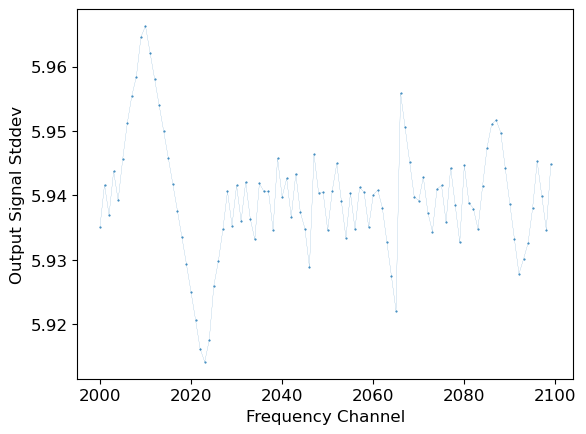

In [ ]:
plt.plot(
    np.arange(2000, 2100),
    np.sqrt(final_variances),
    ".-",
    markersize=1,
    linewidth=0.1,
    color="tab:blue",
)
plt.xlabel("Frequency Channel")
plt.ylabel("Output Signal Stddev")
plt.show()

In [ ]:
# Try dithering
dither_stddev = 2**-17 * np.mean(use_eq_coeffs[2000:2100]) / 10  # Set stddev proportional to the peak separation
final_variances, final_autocorrs = simulation_scripts.requantization_sim(
    np.full_like(data_stddev[2000:2100], data_stddev[2000]),
    use_eq_coeffs[2000:2100],
    dither_stddev=dither_stddev,
)

Processing frequency 1 of 100.


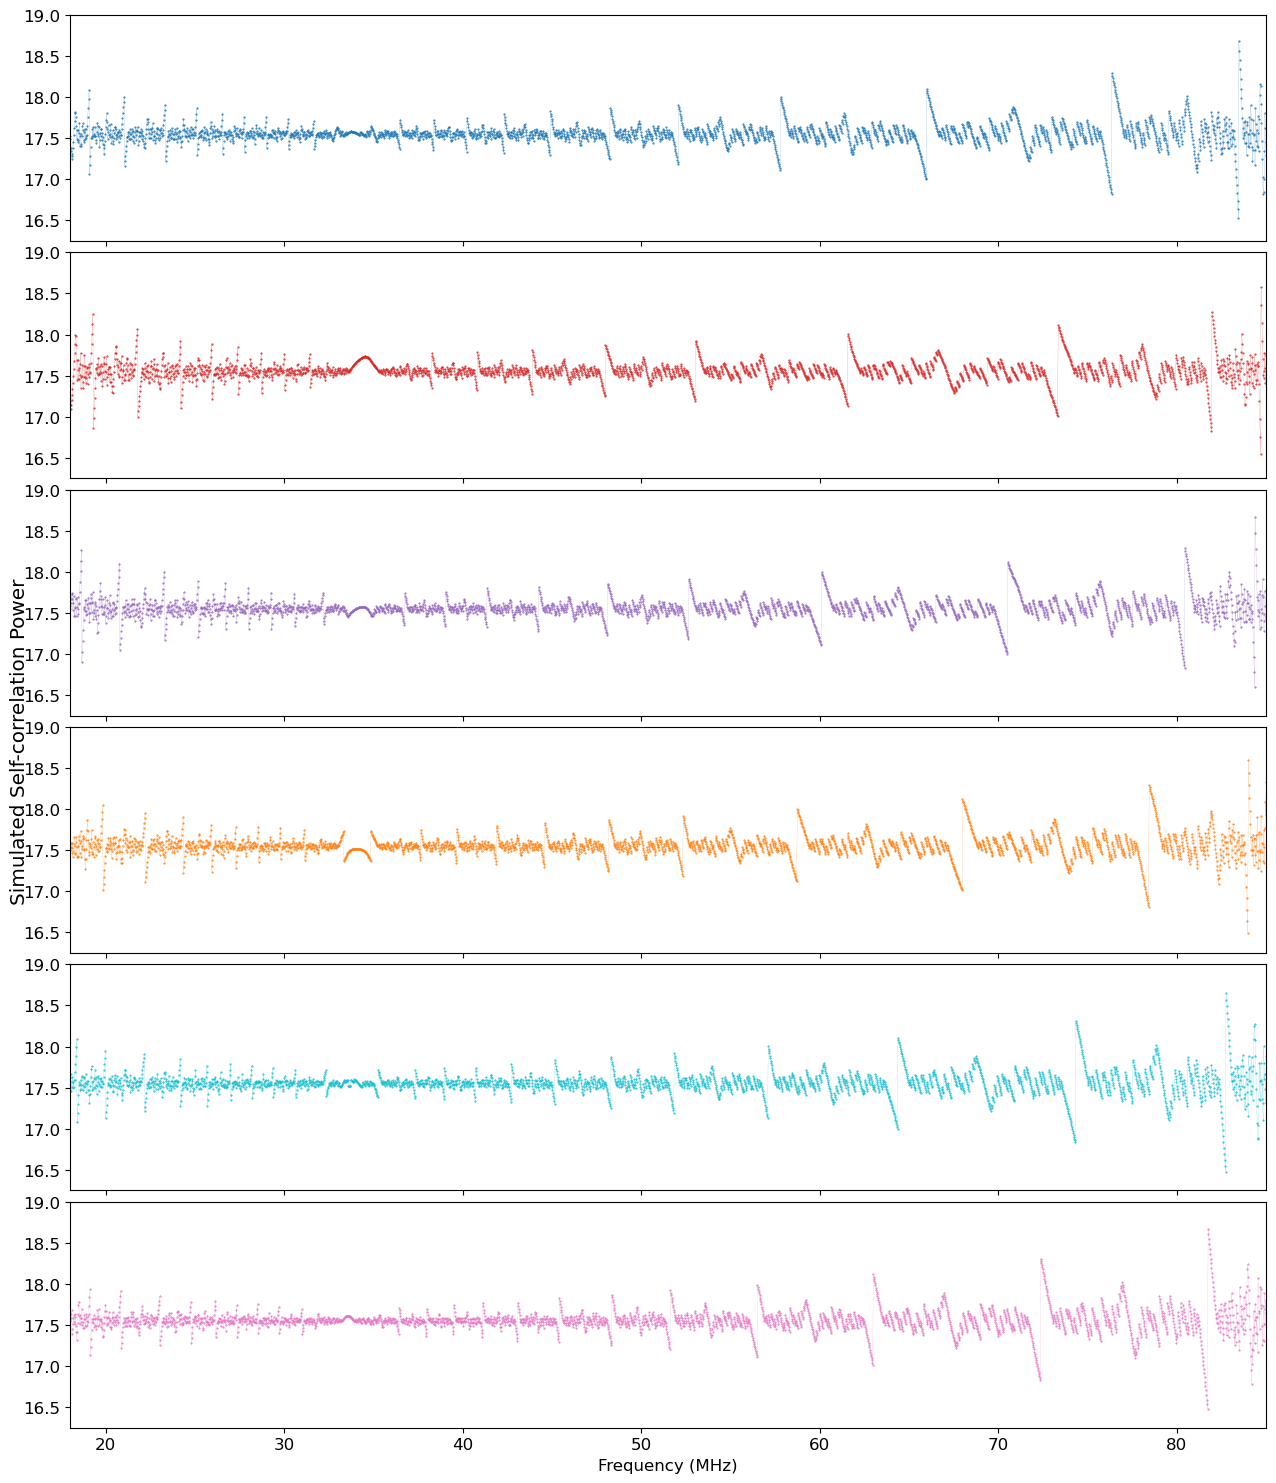

In [195]:
# Full simulation, from files
fig, ax = plt.subplots(nrows=6, figsize=(13, 15), sharex=True)

for simulation_ind in range(6):
    with open(f"simulation_output{simulation_ind}.npy", "rb") as f:
        freq_array = np.load(f)
        final_variances = np.load(f)
        final_autocorrs = np.load(f)
    f.close()

    ax[simulation_ind].plot(
        freq_array,
        final_autocorrs,
        ".-",
        markersize=1,
        linewidth=0.1,
        color=color_array[simulation_ind],
    )
    ax[simulation_ind].set_xlim([18, 85])
    ax[simulation_ind].set_ylim([16.25, 19])
plt.xlabel("Frequency (MHz)")
fig.supylabel("Simulated Self-correlation Power")
plt.tight_layout()
fig.subplots_adjust(hspace=0.05)  # Reduce vertical space between plots
# ax.set_ylim([0, 1])
plt.savefig("/Users/ruby/Downloads/simulated_output.png", dpi=300)
plt.show()

# Paper Plots

Text(0, 0.5, '4-bit Quantized Value')

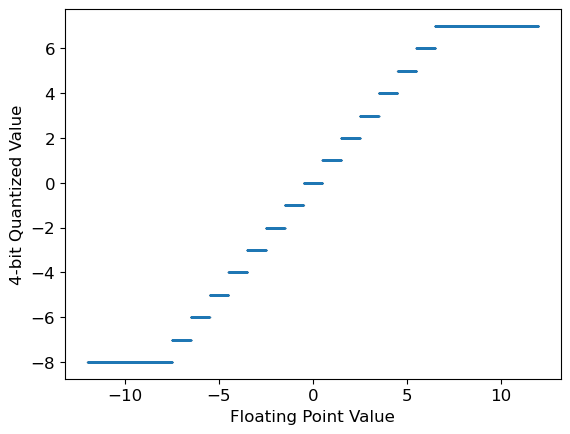

In [14]:
input_vals = np.arange(-12, 12, 0.001)
output_vals = simulation_scripts.quantize(
    input_vals,
    4,
    0,
    signed=True,
    enforce_symmetry=False,
)
plt.plot(input_vals, output_vals, ".", color="tab:blue", markersize=0.1)
plt.xlabel("Floating Point Value")
plt.ylabel("4-bit Quantized Value")
# plt.savefig("/Users/ruby/Downloads/4bit_quantization.png", dpi=300)

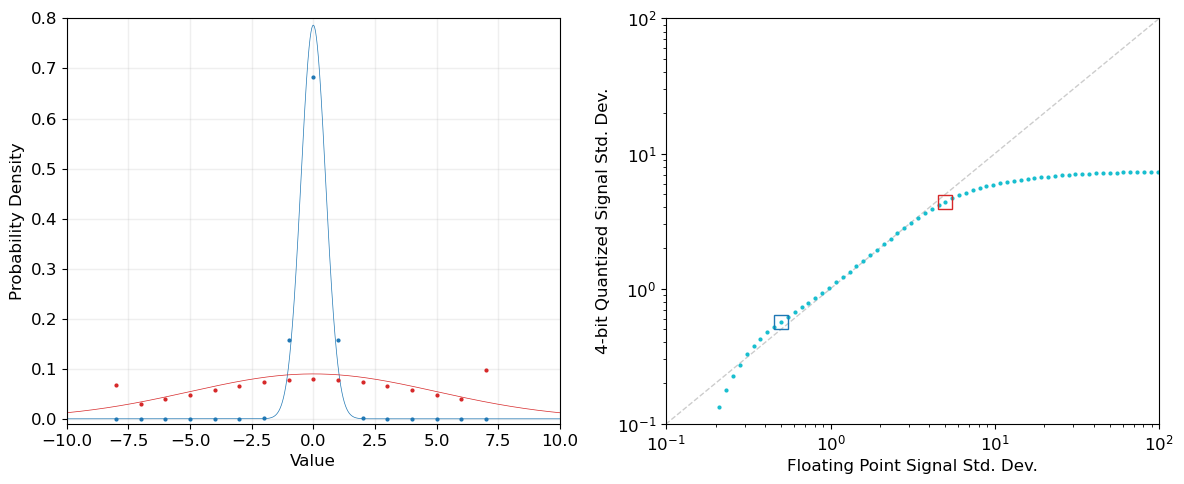

In [236]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

colors = ["tab:blue", "tab:red"]
plot_stddevs = [0.5, 5]
for ind, stddev in enumerate(plot_stddevs):
    color = colors[ind]
    quantized_xvals = simulation_scripts.get_quantized_value_options(
        4, 0, signed=True, enforce_symmetry=False
    )
    analytic_xvals = np.arange(-10, 10, .001)
    gaussian_analytic = np.exp(-(analytic_xvals**2) / (2 * stddev**2))
    gaussian_quantized = simulation_scripts.get_probabilities(stddev, quantized_xvals)
    gaussian_analytic /= np.sum(np.exp(-(quantized_xvals**2) / (2 * stddev**2)))
    ax[0].plot(analytic_xvals, gaussian_analytic, color=color, linewidth=0.5)
    ax[0].plot(quantized_xvals, gaussian_quantized, ".", color=color, markersize=4)
    ax[0].set_ylim([-1e-2,.8])
    ax[0].set_xlim([-10, 10])
    ax[0].set_xlabel("Value")
    ax[0].set_ylabel("Probability Density")
    ax[0].grid(True, linewidth=1, alpha=0.2)

quantized_xvals = simulation_scripts.get_quantized_value_options(
    4, 0, signed=True, enforce_symmetry=False
)
point_separation = (np.log(plot_stddevs[1]) - np.log(plot_stddevs[0])) / 24
stddev_array = np.exp(
    np.arange(np.log(plot_stddevs[0]) - point_separation * 20, 1e1, point_separation)
)
variance_array = np.zeros_like(stddev_array)
for ind, stddev in enumerate(stddev_array):
    probability = simulation_scripts.get_probabilities(stddev, quantized_xvals)
    variance_array[ind] = simulation_scripts.calculate_variance(
        quantized_xvals, probability
    )

ax[1].plot([0, 100], [0, 100], "--", color="black", alpha=0.2, linewidth=1)
ax[1].plot(stddev_array, np.sqrt(variance_array), ".", markersize=4, color="tab:cyan")
for ind, stddev in enumerate(plot_stddevs):
    color = colors[ind]
    use_ind = np.where(
        np.abs(stddev_array - stddev) == np.min(np.abs(stddev_array - stddev))
    )[0][0]
    ax[1].plot(
        stddev_array[use_ind],
        np.sqrt(variance_array[use_ind]),
        "s",
        markersize=10,
        markerfacecolor="None",
        markeredgecolor=color,
        markeredgewidth=1,
    )
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlim([1e-1, 1e2])
ax[1].set_ylim([1e-1, 1e2])
ax[1].set_xlabel("Floating Point Signal Std. Dev.")
ax[1].set_ylabel("4-bit Quantized Signal Std. Dev.")
plt.tight_layout()

plt.savefig("/Users/ruby/Downloads/quantized_probabilities.png", dpi=300)

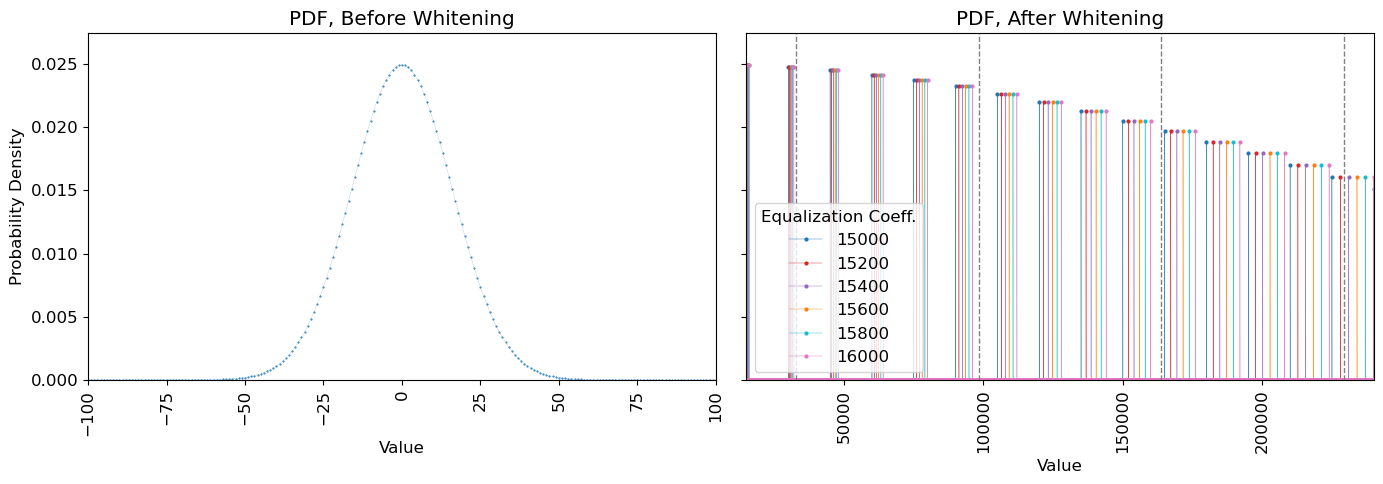

In [96]:
color = "tab:blue"
stddev = 16
requant_gain = 2**16
quantized_xvals = simulation_scripts.get_quantized_value_options(
    18,
    0,
    signed=True,
    enforce_symmetry=False,
)
gaussian_quantized = simulation_scripts.get_probabilities(stddev, quantized_xvals)

fig,ax = plt.subplots(ncols=2, figsize=(14,5), sharey=True)

ax[0].plot(
    quantized_xvals,
    gaussian_quantized,
    ".-",
    color=color,
    markersize=1,
    linewidth=0.1,
)
ax[0].set_xlabel("Value")
ax[0].set_xlim([-100, 100])

ax[0].set_ylim([0, 1.1 * np.max(gaussian_quantized)])
ax[0].tick_params(axis="x", labelrotation=90)
ax[0].set_ylabel("Probability Density")
ax[0].set_title("PDF, Before Whitening")

equalized_range = [14900, 240100]
equalized_xvals = np.arange(equalized_range[0], equalized_range[1])
for equalization_coeff in [15000, 15200, 15400, 15600, 15800, 16000]:
    equalized_pdf = np.zeros_like(equalized_xvals, dtype=float)
    for ind in range(len(quantized_xvals)):
        equalized_pdf[
            np.where(equalized_xvals == quantized_xvals[ind] * equalization_coeff)[0]
        ] = gaussian_quantized[ind]
    ax[1].plot(
        equalized_xvals,
        equalized_pdf,
        ".-",
        label=equalization_coeff,
        markersize=4,
        linewidth=0.3,
    )
    ax[1].tick_params(axis="x", labelrotation=90)
    ax[1].set_title("PDF, After Whitening")
    ax[1].legend(title="Equalization Coeff.")
    ax[1].set_xlabel("Value")
    ax[1].set_xlim(equalized_range)

bin_boundaries = (np.arange(10) - 0.5) * requant_gain
for boundary in bin_boundaries:
    ax[1].plot([boundary, boundary], [0, 1.1 * np.max(gaussian_quantized)], 
        "--",
        color="grey",
        linewidth=1,
    )

plt.tight_layout()

plt.savefig("/Users/ruby/Downloads/pdf_whitening.png", dpi=300)

In [112]:
eq_coeffs = np.array([14000, 15000, 16000, 17000])
final_quantized_value_options, final_quantized_probabilities = (
    simulation_scripts.get_requantized_probabilities(
        np.full_like(eq_coeffs, 16, dtype=float),
        eq_coeffs,
        input_bits_total=18,
        input_bits_fractional=0,
        output_bits_total=4,
        output_bits_fractional=0,
        requantization_gain=2**16,
    )
)

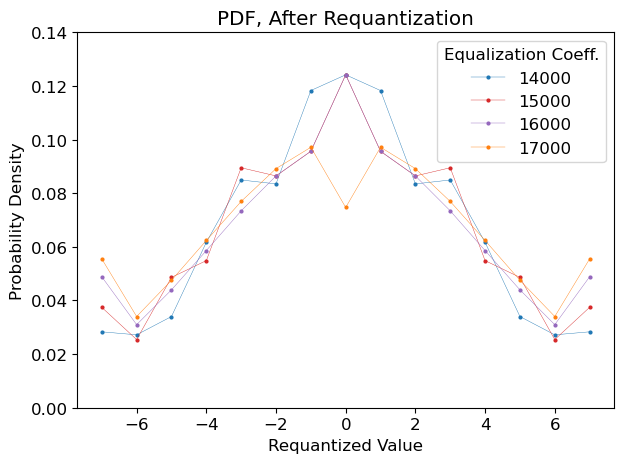

In [237]:
for coeff_ind, eq_coeff in enumerate(eq_coeffs):
    plt.plot(
        final_quantized_value_options,
        final_quantized_probabilities[:, coeff_ind],
        ".-",
        markersize=4,
        linewidth=0.3,
        label=eq_coeff,
    )
plt.xlabel("Requantized Value")
plt.ylabel("Probability Density")
plt.legend(title="Equalization Coeff.")
plt.ylim([0,0.14])
plt.title("PDF, After Requantization")
plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/pdf_requantized.png", dpi=300)

# How Much Equalization Can We Handle?

In [ ]:
target_value

0.375

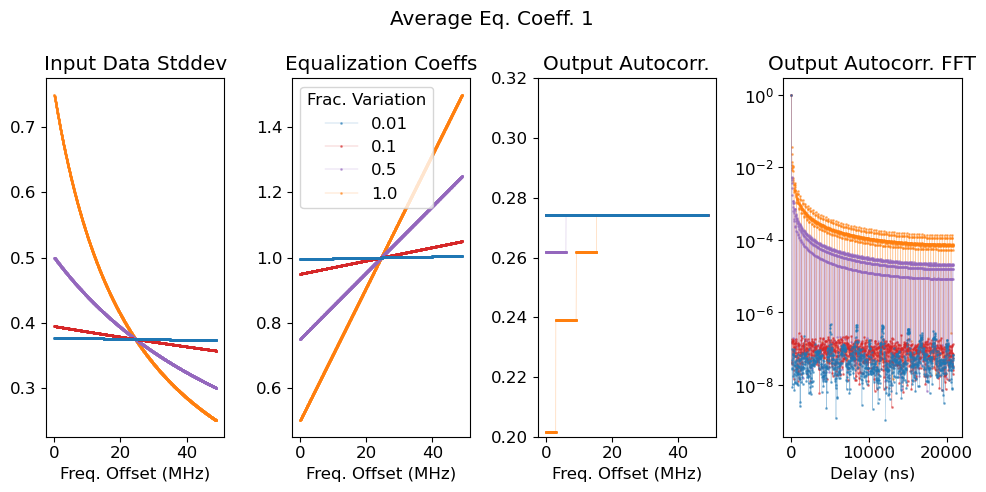

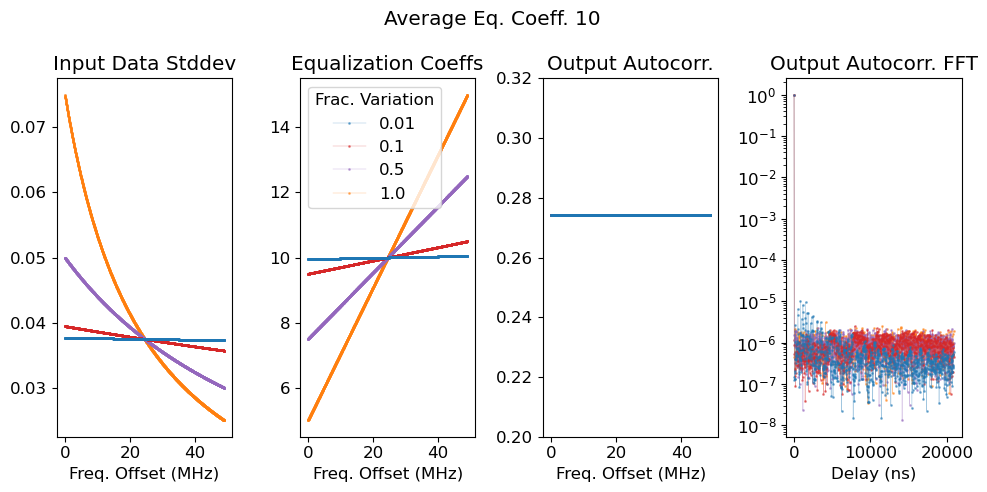

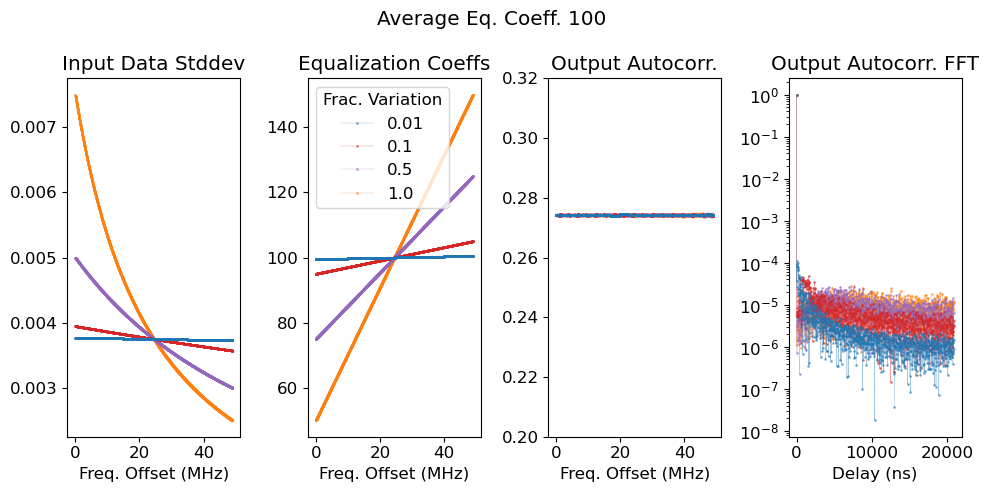

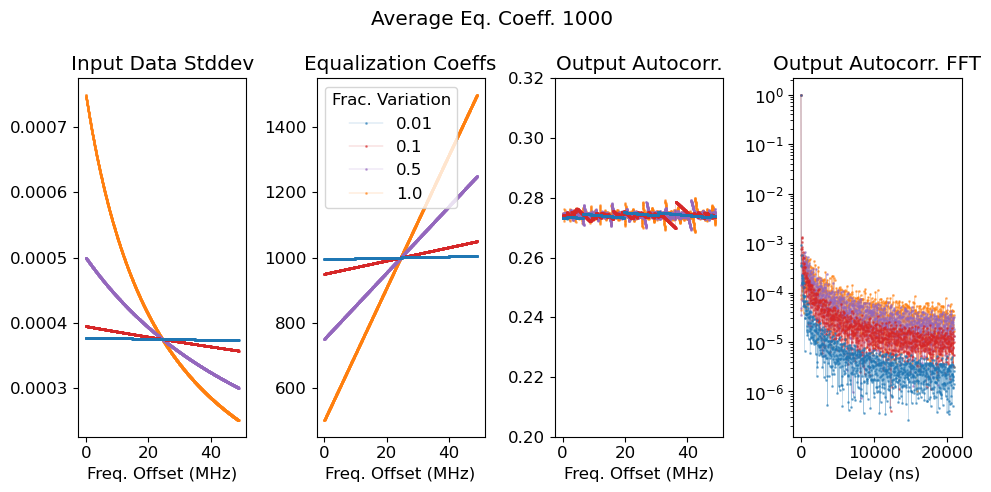

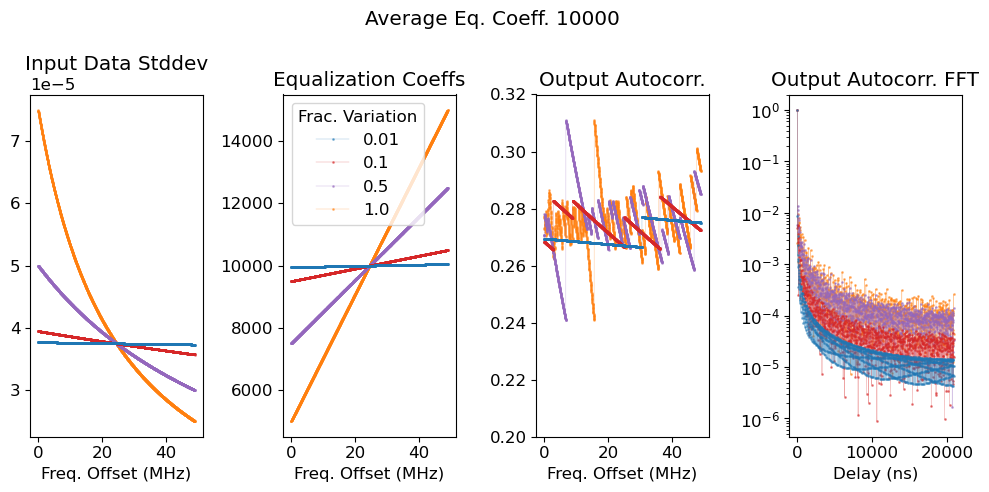

In [ ]:
# Load simulations from files
with open("constant_slope_output.npy", "rb") as f:
    freq_array = np.load(f)
    avg_eq_coeffs = np.load(f)
    eq_coeff_frac_variation = np.load(f)
    final_autocorrs = np.load(f)
f.close()
target_value = 3 / 2**3

for eq_ind, avg_eq_coeff in enumerate(avg_eq_coeffs):
    fig, ax = plt.subplots(ncols=4, figsize=(10,5))
    for coeff_slope_ind, eq_coeff_var in enumerate(eq_coeff_frac_variation):
        eq_coeffs = np.linspace(
            avg_eq_coeff - avg_eq_coeff * eq_coeff_var / 2,
            avg_eq_coeff + avg_eq_coeff * eq_coeff_var / 2,
            num=len(freq_array),
        )
        data_stddev = target_value / eq_coeffs
        autocorrs = final_autocorrs[eq_ind, coeff_slope_ind, :]

        # Delay transform
        autocorrs_fft = np.abs(np.fft.fft(autocorrs))[0 : int(len(freq_array) / 2)]
        autocorrs_fft /= np.max(autocorrs_fft)
        delays_ns = (
            np.fft.fftfreq(len(freq_array), d=channel_width_mhz * 1e6)[
                0 : int(len(freq_array) / 2)
            ]
            * 1e9
        )

        ax[0].plot(
            freq_array,
            data_stddev,
            ".-",
            markersize=2,
            linewidth=0.3,
            zorder=len(eq_coeff_frac_variation) - coeff_slope_ind,
            alpha=0.5,
        )
        ax[1].plot(
            freq_array,
            eq_coeffs,
            ".-",
            markersize=2,
            linewidth=0.3,
            zorder=len(eq_coeff_frac_variation) - coeff_slope_ind,
            alpha=0.5,
            label=eq_coeff_var,
        )
        ax[2].plot(
            freq_array,
            autocorrs,
            ".-",
            markersize=2,
            linewidth=0.3,
            zorder=len(eq_coeff_frac_variation) - coeff_slope_ind,
            alpha=0.5,
        )
        ax[3].plot(
            delays_ns,
            autocorrs_fft,
            ".-",
            markersize=2,
            linewidth=0.3,
            zorder=len(eq_coeff_frac_variation) - coeff_slope_ind,
            alpha=0.5,
        )

    ax[0].set_title("Input Data Stddev")
    ax[0].set_xlabel("Freq. Offset (MHz)")
    ax[1].set_title("Equalization Coeffs")
    ax[1].set_xlabel("Freq. Offset (MHz)")
    ax[1].legend(title="Frac. Variation")
    ax[2].set_title("Output Autocorr.")
    ax[2].set_xlabel("Freq. Offset (MHz)")
    ax[2].set_ylim([.2, .32])
    ax[3].set_title("Output Autocorr. FFT")
    ax[3].set_xlabel("Delay (ns)")
    ax[3].set_yscale("log")
    fig.suptitle(f"Average Eq. Coeff. {avg_eq_coeff}")
    plt.tight_layout()
    plt.show()

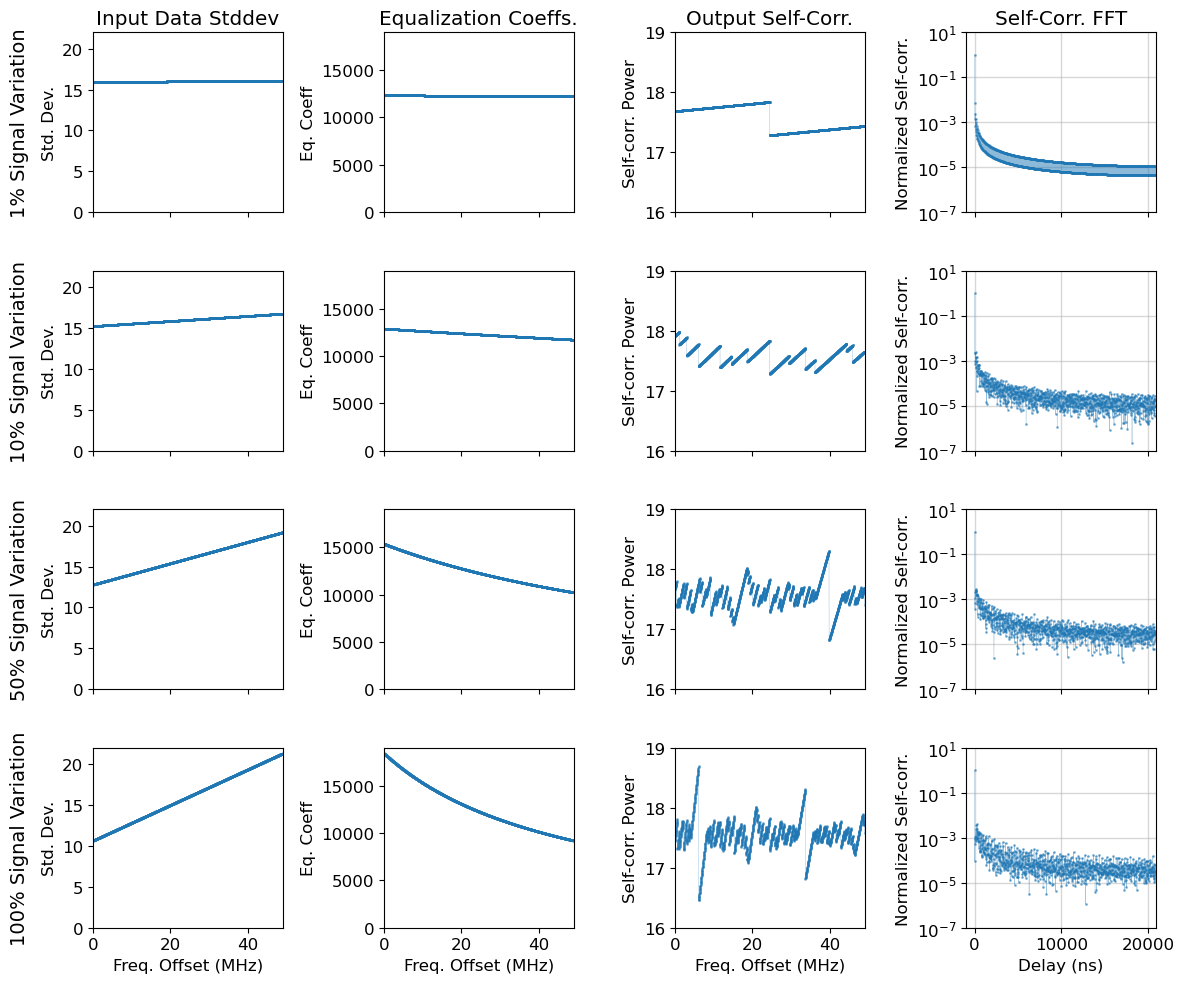

In [308]:
# Load simulations from files
channel_width_mhz = 23925.78125 * 1e-6
nfreqs = 2048
average_signal_stddev = 16
requantization_gain = 2**16
target_value = 3 * requantization_gain
freq_array = np.arange(nfreqs) * channel_width_mhz

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(12, 10))

for var_ind, use_var in enumerate([0.01, 0.1, 0.5, 1.0]):
    with open(f"const_slope_simulation_output_slope{use_var}.npy", "rb") as f:
        variance = np.load(f)
        autocorr = np.load(f)
    f.close()

    min_signal_stddev = 2 * average_signal_stddev / (2 + use_var)
    max_signal_stddev = 2 * average_signal_stddev - min_signal_stddev
    data_stddev = np.linspace(min_signal_stddev, max_signal_stddev, num=nfreqs)
    eq_coeffs = target_value / data_stddev

    # Delay transform
    autocorrs_fft = np.abs(np.fft.fft(autocorr))[0 : int(len(freq_array) / 2)]
    autocorrs_fft /= np.max(autocorrs_fft)
    delays_ns = (
        np.fft.fftfreq(len(freq_array), d=channel_width_mhz * 1e6)[
            0 : int(len(freq_array) / 2)
        ]
        * 1e9
    )

    ax[var_ind, 0].plot(
        freq_array,
        data_stddev,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[var_ind, 1].plot(
        freq_array,
        eq_coeffs,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[var_ind, 2].plot(
        freq_array,
        autocorr,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[var_ind, 3].plot(
        delays_ns,
        autocorrs_fft,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )

    ax[var_ind, 0].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[var_ind, 0].set_ylim([0, 22])
    ax[var_ind, 0].set_ylabel("Std. Dev.")

    ax[var_ind, 1].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[var_ind, 1].set_ylim([0, 19000])
    ax[var_ind, 1].set_ylabel("Eq. Coeff")

    ax[var_ind, 2].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[var_ind, 2].set_ylim([16, 19])
    ax[var_ind, 2].set_ylabel("Self-corr. Power")

    ax[var_ind, 3].set_yscale("log")
    ax[var_ind, 3].set_xlim([np.min(delays_ns) - 1000, np.max(delays_ns)])
    ax[var_ind, 3].set_ylim([1e-7, 1e1])
    ax[var_ind, 3].grid(True, linewidth=1, alpha=0.5)
    ax[var_ind, 3].set_ylabel("Normalized Self-corr.")
    # fig.suptitle(f"Average Eq. Coeff. {avg_eq_coeff}")
    if var_ind != 3:
        ax[var_ind, 0].tick_params(labelbottom=False)
        ax[var_ind, 1].tick_params(labelbottom=False)
        ax[var_ind, 2].tick_params(labelbottom=False)
        ax[var_ind, 3].tick_params(labelbottom=False)


ax[0, 0].set_title("Input Data Stddev")
ax[0, 1].set_title("Equalization Coeffs.")
ax[0, 2].set_title("Output Self-Corr.")
ax[0, 3].set_title("Self-Corr. FFT")

ax[3, 0].set_xlabel("Freq. Offset (MHz)")
ax[3, 1].set_xlabel("Freq. Offset (MHz)")
ax[3, 2].set_xlabel("Freq. Offset (MHz)")
ax[3, 3].set_xlabel("Delay (ns)")

row_labels = [
    "1% Signal Variation",
    "10% Signal Variation",
    "50% Signal Variation",
    "100% Signal Variation",
]

for i, label in enumerate(row_labels):
    ax[i, 0].annotate(
        label,
        xy=(0, 0.5),
        xytext=(-ax[i, 0].yaxis.labelpad - 5, 0),
        xycoords=ax[i, 0].yaxis.label,
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
        fontsize=14,
        #fontweight="bold",
    )

plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/constant_slope_sims.png", dpi=300)
plt.show()

In [310]:
len(freq_array)

2048

In [311]:
freq_array[-1]-freq_array[0]

48.97607421875